## **1. Visualización y familiarización del dataset**

In [1]:
# Librerías necesarias
library(ggplot2)      # Gráficos
library(dplyr)        # Manipulación de datos
library(tidyr)        # Limpieza de datos
library(readr)       # Lectura de datos
library(ggcorrplot)  # Visualización de matrices de correlación
library(FactoMineR)     
library(FactoMineR)
library(factoextra)


# Configuración de tema para gráficos
theme_set(theme_minimal() + 
          theme(plot.title = element_text(face = "bold", size = 14),
                axis.title = element_text(size = 11)))

#no warning messages
options(warn=-1)


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Instalar paquetes si no están disponibles
if (!require(ggcorrplot)) {
    install.packages("ggcorrplot", repos = "https://cran.rstudio.com/")
    library(ggcorrplot)
}

if (!require(FactoMineR)) {
    install.packages("FactoMineR", repos = "https://cran.rstudio.com/")
    library(FactoMineR)
}

if (!require(factoextra)) {
    install.packages("factoextra", repos = "https://cran.rstudio.com/")
    library(factoextra)
}

In [3]:
# Carga de datos (20230119_DatosBoston.csv)
# El CSV usa ';' como separador
data_dir <- "C:/Users/cmoli/OneDrive/Documentos/GitHub/asignatura-herramientas-de-visualizaci-n/datasets/20230119_DatosBoston.csv"

Boston <- read.csv(data_dir, sep = ";", dec = ".", stringsAsFactors = FALSE)
head(Boston)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


In [4]:
# Estructura del Dataset
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
# Resumen estadístico del Dataset
summary(Boston)

  crime_index         urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.69568   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.33700   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.65400   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max

[1] 0

[1] 0

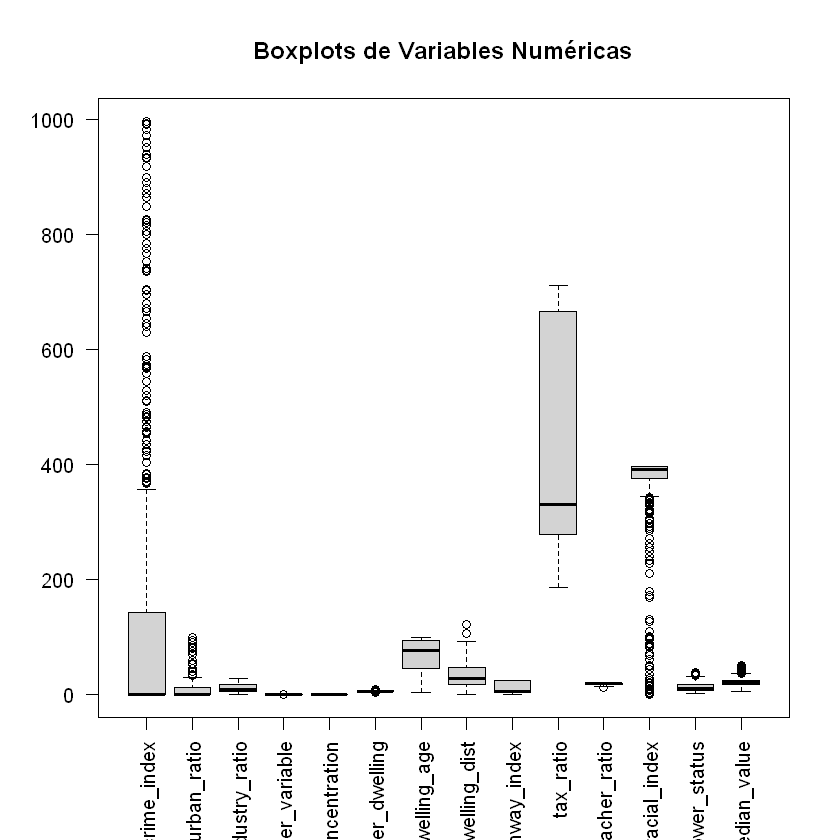

In [6]:
# Comprobar valores nulos y duplicados
sum(is.na(Boston))          # Valores nulos
sum(duplicated(Boston))    # Filas duplicadas

# Comprobar outliers en variables numéricas
numeric_vars <- sapply(Boston, is.numeric)
boxplot(Boston[, numeric_vars], main = "Boxplots de Variables Numéricas", las = 2)


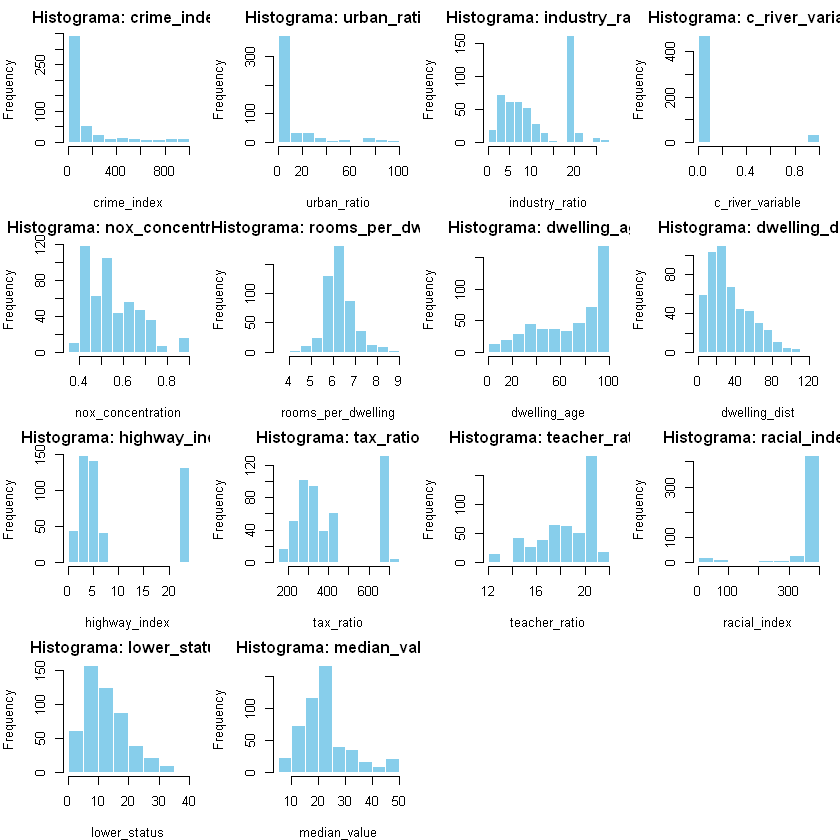

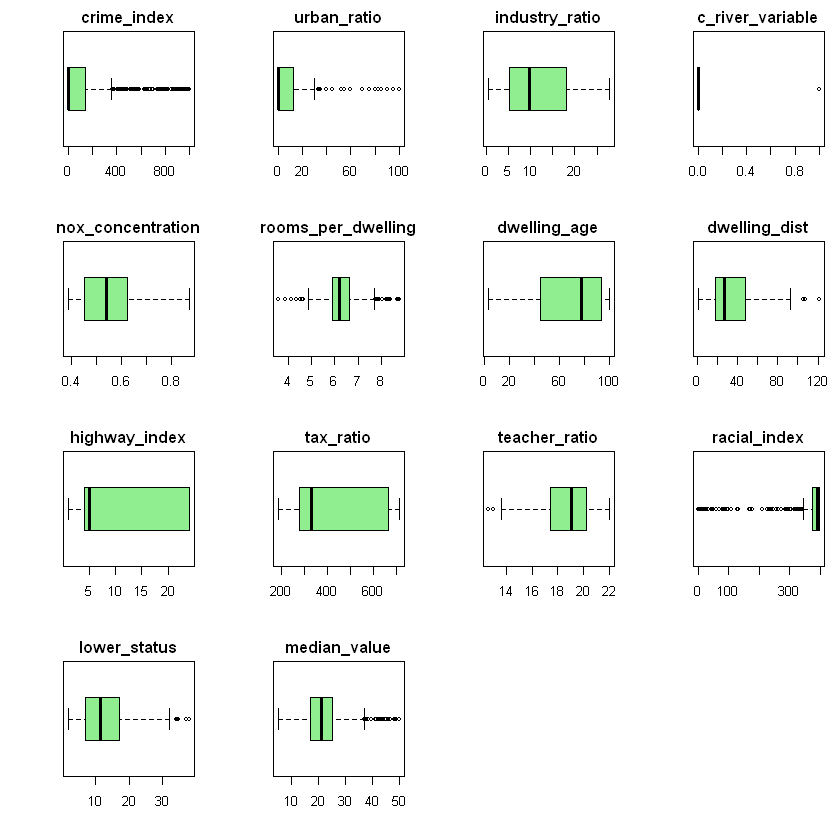

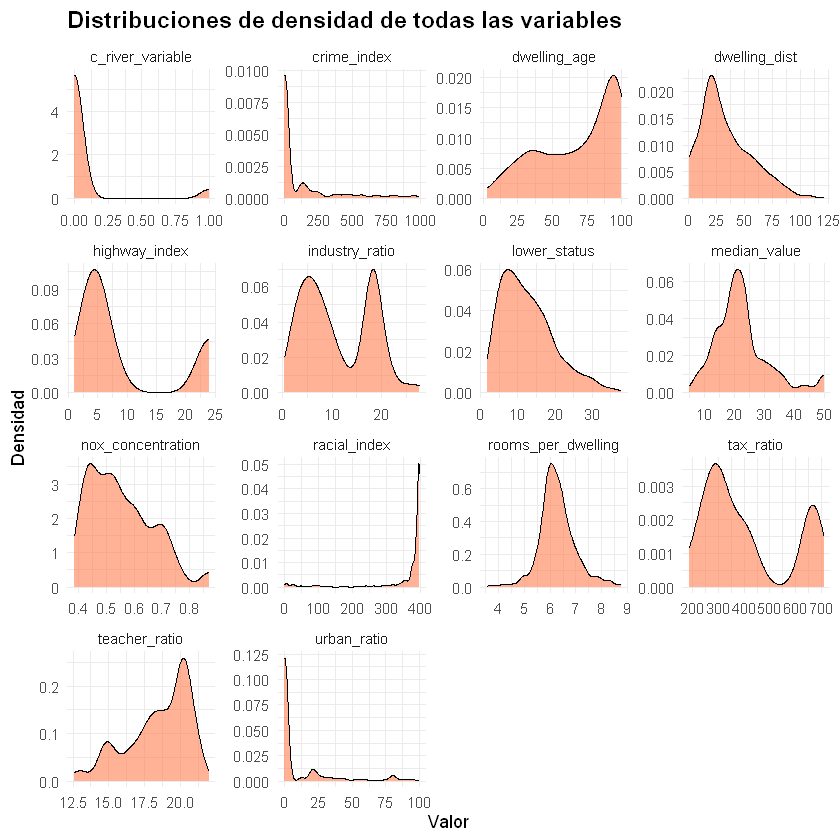

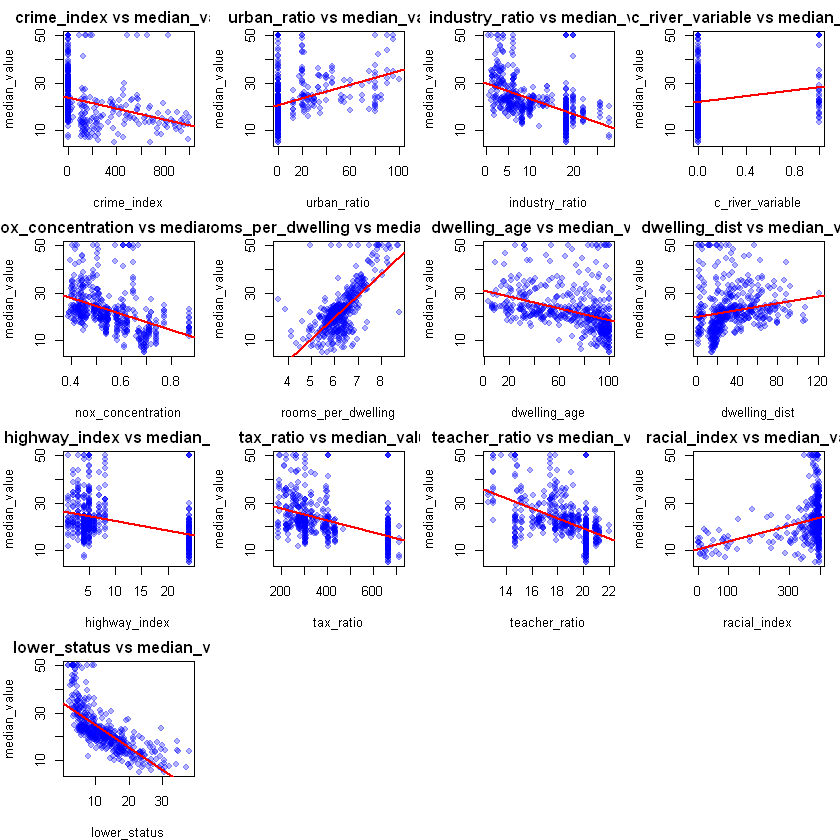

In [7]:
# EDA visual completo de todas las variables

# 1. Histogramas de todas las variables numéricas
par(mfrow = c(4, 4), mar = c(4, 4, 2, 1))
for (col in names(Boston)) {
    if (is.numeric(Boston[[col]])) {
        hist(Boston[[col]], 
                 main = paste("Histograma:", col),
                 xlab = col,
                 col = "skyblue",
                 border = "white")
    }
}
par(mfrow = c(1, 1))

# 2. Boxplots individuales para identificar outliers
par(mfrow = c(4, 4), mar = c(4, 4, 2, 1))
for (col in names(Boston)) {
    if (is.numeric(Boston[[col]])) {
        boxplot(Boston[[col]], 
                        main = col,
                        col = "lightgreen",
                        horizontal = TRUE)
    }
}
par(mfrow = c(1, 1))

# 3. Gráficos de densidad con ggplot2
library(tidyr)
Boston_long <- Boston %>% 
    pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

ggplot(Boston_long, aes(x = value)) +
    geom_density(fill = "coral", alpha = 0.6) +
    facet_wrap(~variable, scales = "free") +
    labs(title = "Distribuciones de densidad de todas las variables",
             x = "Valor", y = "Densidad")

# 4. Gráficos de dispersión de todas las variables vs median_value
par(mfrow = c(4, 4), mar = c(4, 4, 2, 1))
for (col in names(Boston)) {
    if (col != "median_value" && is.numeric(Boston[[col]])) {
        plot(Boston[[col]], Boston$median_value,
                 xlab = col,
                 ylab = "median_value",
                 main = paste(col, "vs median_value"),
                 pch = 19,
                 col = rgb(0, 0, 1, 0.3))
        abline(lm(Boston$median_value ~ Boston[[col]]), col = "red", lwd = 2)
    }
}
par(mfrow = c(1, 1))



##### 1. Estructura del dataset

El conjunto de datos está compuesto por **506 observaciones y 14 variables**.  
Todas las variables son numéricas, siendo `c_river_variable` una variable binaria (0/1).  
La variable objetivo del análisis es **`median_value`**, que representa el valor medio de la vivienda en miles de dólares.

No se detectan valores nulos ni filas duplicadas, por lo que el dataset se encuentra listo para su análisis.

---

##### 2. Estadísticos descriptivos

El resumen estadístico permite comprender el comportamiento general de cada variable:

- **crime_index**  
  Presenta una elevada variabilidad. La mayoría de zonas tienen valores bajos de criminalidad, aunque existen barrios con índices muy altos.

- **urban_ratio**  
  La mediana es 0, lo que indica que gran parte de las observaciones corresponden a zonas con baja proporción urbana, aunque existen áreas completamente urbanizadas.

- **industry_ratio**  
  Muestra una amplia dispersión, reflejando diferencias en la actividad industrial entre zonas.

- **c_river_variable**  
  Variable binaria que indica si una zona colinda con el río. La mayoría de viviendas no se sitúan junto al río.

- **nox_concentration**  
  Presenta variaciones moderadas, lo que sugiere diferencias ambientales entre barrios.

- **rooms_per_dwelling**  
  Distribución relativamente concentrada, indicando un número medio de habitaciones similar entre zonas.

- **dwelling_age**  
  Valores elevados en media y mediana indican que gran parte de las viviendas son antiguas.

- **dwelling_dist**  
  Refleja diferencias claras en la distancia a los centros urbanos.

- **highway_index**  
  Variable discreta que muestra distintos niveles de accesibilidad a autopistas.

- **tax_ratio**  
  Amplio rango de valores, lo que indica diferencias notables en la presión fiscal entre barrios.

- **teacher_ratio**  
  Distribución concentrada, con ratios de alumnos por profesor similares entre zonas.

- **racial_index**  
  Valores generalmente elevados, reflejando concentraciones significativas de población no caucásica en determinadas áreas.

- **lower_status**  
  Amplia variabilidad en el porcentaje de población de clase baja, siendo una variable clave en el contexto socioeconómico.

- **median_value**  
  El valor medio de la vivienda se concentra principalmente entre 15 y 25 (en miles de USD), con un límite superior claro en 50.

---

##### 3. Histogramas y distribuciones de densidad

Los histogramas y curvas de densidad permiten analizar la forma de las distribuciones:

- **crime_index y urban_ratio**  
  Distribuciones muy asimétricas, con alta concentración en valores bajos.

- **industry_ratio**  
  Distribución más repartida, reflejando heterogeneidad en la actividad industrial.

- **c_river_variable**  
  Distribución claramente binaria.

- **nox_concentration**  
  Distribución relativamente suave, indicando variaciones ambientales progresivas.

- **rooms_per_dwelling**  
  Distribución aproximadamente simétrica, centrada en torno a 6 habitaciones.

- **dwelling_age**  
  Alta concentración en valores elevados, lo que indica viviendas mayoritariamente antiguas.

- **dwelling_dist**  
  Mayor densidad en distancias cortas, decreciendo a medida que aumenta la distancia.

- **highway_index y tax_ratio**  
  Distribuciones multimodales, sugiriendo agrupaciones por niveles.

- **lower_status**  
  Distribución decreciente, con mayor concentración en valores bajos y medios.

- **median_value**  
  Distribución aproximadamente normal, con un límite superior definido.

---

##### 4. Boxplots

Los boxplots permiten comparar la dispersión y el rango de las variables:

- **crime_index, tax_ratio y racial_index**  
  Presentan rangos amplios, indicando gran heterogeneidad entre barrios.

- **rooms_per_dwelling y teacher_ratio**  
  Muestran menor dispersión, reflejando mayor estabilidad estructural.

- **median_value**  
  Se concentra en un rango intermedio, con menor variabilidad relativa frente a otras variables socioeconómicas.

---

##### 5. Relación entre variables explicativas y `median_value`

Los gráficos de dispersión con líneas de tendencia muestran patrones claros:

- **Relaciones positivas**  
  - `rooms_per_dwelling`: a mayor número de habitaciones, mayor valor de la vivienda.  
  - `urban_ratio`: ligera tendencia positiva.  
  - `dwelling_dist`: relación positiva moderada.

- **Relaciones negativas**  
  - `lower_status`: relación negativa muy marcada.  
  - `crime_index`: mayor criminalidad se asocia con menor valor.  
  - `nox_concentration`: peor calidad ambiental se relaciona con precios más bajos.  
  - `industry_ratio`, `highway_index`, `tax_ratio`, `teacher_ratio` y `dwelling_age` también muestran tendencias negativas.

- **Relación poco clara**  
  - `c_river_variable`, donde no se observa una diferencia clara entre zonas con y sin río.

---

##### 6. Conclusiones del análisis exploratorio

- El dataset presenta una elevada diversidad entre barrios.
- Existen relaciones claras entre variables socioeconómicas, ambientales y el valor de la vivienda.
- Variables como `lower_status` y `rooms_per_dwelling` destacan por su fuerte relación con `median_value`.
- Este análisis proporciona una base sólida para análisis posteriores de correlación, PCA y regresión lineal.


## **2. Análisis de correlación y de componentes principales**

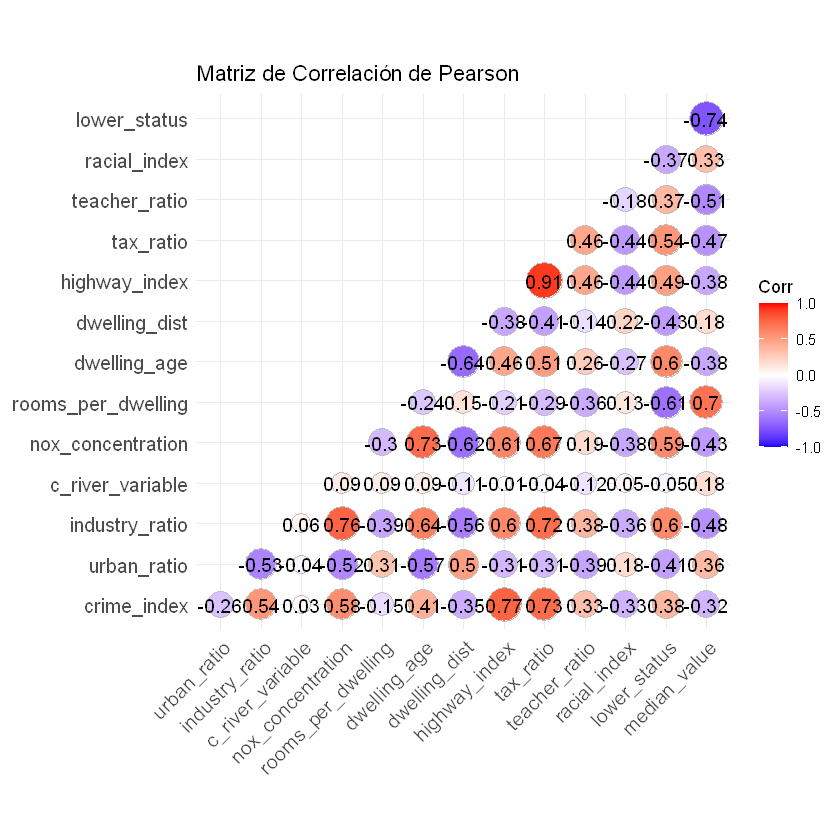

In [8]:
# Correlación de Pearson entre variables numéricas con heatmap (variable de interés: median_value)
# Seleccionar solo columnas numéricas
Boston_numeric <- Boston[, sapply(Boston, is.numeric)]
cor_matrix <- cor(Boston_numeric, use = "complete.obs")

ggcorrplot(cor_matrix, 
           method = "circle", 
           type = "lower", 
           lab = TRUE, 
           title = "Matriz de Correlación de Pearson",
           colors = c("blue", "white", "red"))  

# Restaurar opciones de advertencias
options(warn=0)


In [9]:
#Análisis de componentes principales (PCA) para reducción de dimensionalidad
pca_result <- PCA(Boston_numeric, scale.unit = TRUE, ncp = 5, graph = TRUE)

#Resumen de resultados PCA
summary(pca_result)


Call:
PCA(X = Boston_numeric, scale.unit = TRUE, ncp = 5, graph = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               6.441   1.676   1.388   0.881   0.864   0.685   0.426
% of var.             46.009  11.974   9.913   6.296   6.173   4.893   3.040
Cumulative % of var.  46.009  57.984  67.897  74.192  80.365  85.257  88.297
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.382   0.350   0.264   0.230   0.195   0.158   0.060
% of var.              2.729   2.500   1.886   1.641   1.390   1.130   0.427
Cumulative % of var.  91.026  93.526  95.412  97.053  98.443  99.573 100.000

Individuals (the 10 first)
                       Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
1                  |  2.985 | -1.792  0.099  0.360 |  0.823  0.080  0.076 |
2                  |  2.102 | -1.444  0.064  0.472 | -0.490  0.028  0.054 |
3                  |  2.981 | -2.444  0.

Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
"Ignoring empty aesthetic: `width`."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>."


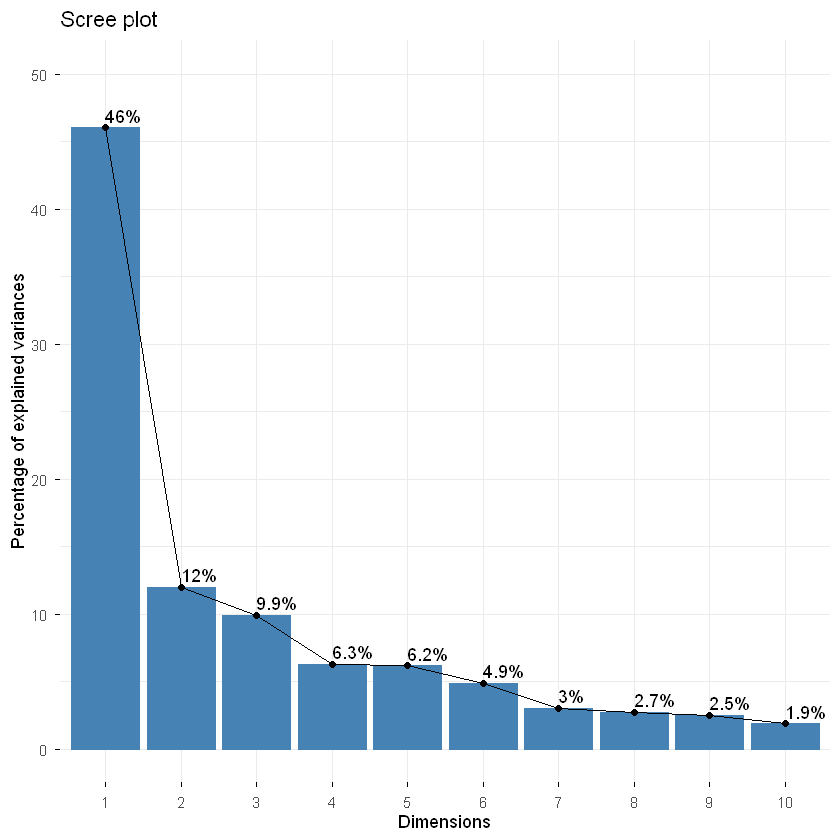

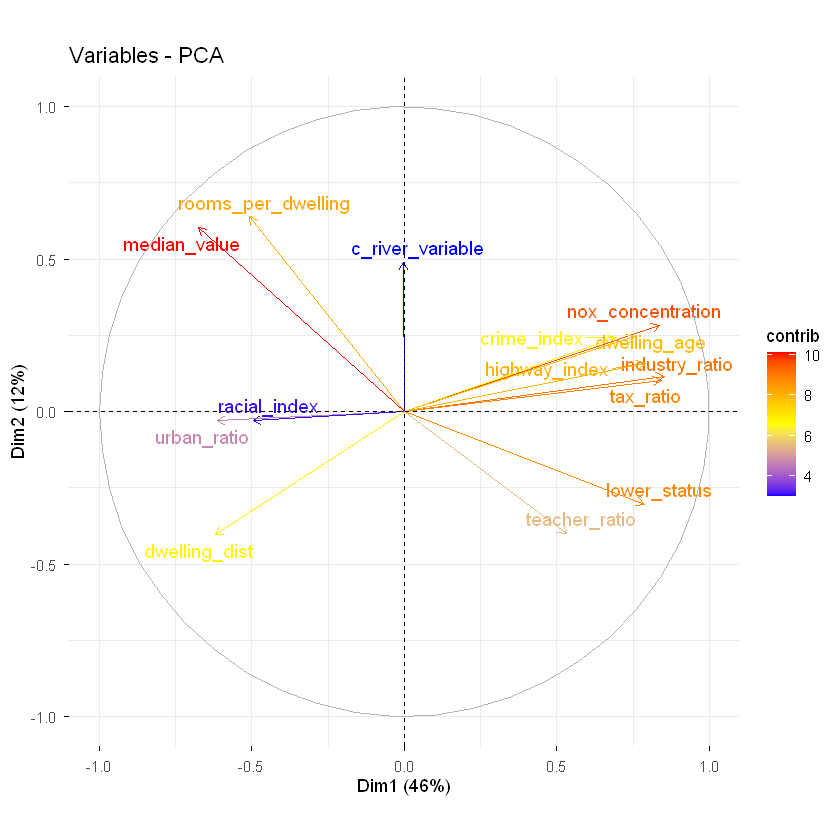

In [10]:
#Screeplot
fviz_screeplot(pca_result, addlabels = TRUE, ylim = c(0, 50))

#Mapa de variables
fviz_pca_var(pca_result, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"),
             repel = TRUE)

#### Análisis de Correlación

Se ha realizado un análisis de correlación de Pearson con el objetivo de estudiar las relaciones lineales entre las variables del dataset y detectar patrones relevantes antes de aplicar técnicas de reducción de dimensionalidad.

La matriz de correlación muestra que la variable objetivo `median_value` presenta una **fuerte correlación positiva con `rooms_per_dwelling`**, lo que indica que las viviendas con mayor número medio de habitaciones tienden a tener un mayor valor de mercado. En contraste, `lower_status` presenta una **correlación negativa elevada con `median_value`**, reflejando que las zonas con mayor porcentaje de población de clase baja se asocian con precios de vivienda más bajos.

Otras variables como `crime_index`, `tax_ratio` y `teacher_ratio` muestran correlaciones negativas moderadas con el valor de la vivienda, mientras que variables como `dwelling_dist` y `urban_ratio` presentan correlaciones positivas más débiles. 

Además, se observan **fuertes correlaciones entre variables explicativas**, como `industry_ratio` con `nox_concentration`, y `highway_index` con `tax_ratio`, lo que indica la existencia de dependencias internas entre predictores y sugiere posibles problemas de multicolinealidad.

---

#### Análisis de Componentes Principales

A partir de las relaciones observadas en el análisis de correlación, se ha aplicado un Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad del conjunto de variables y resumir la información contenida en variables altamente correlacionadas.

El scree plot muestra que la **primera componente principal explica aproximadamente el 46% de la varianza total**, mientras que la segunda y tercera componentes explican alrededor del 12% y 10%, respectivamente. En conjunto, las tres primeras componentes concentran cerca del 68% de la varianza, lo que permite una reducción significativa de la dimensionalidad sin una pérdida excesiva de información.

El mapa de variables del PCA permite interpretar el significado de las componentes. La **primera componente principal** está asociada principalmente a variables relacionadas con el entorno urbano, industrial y socioeconómico, como `industry_ratio`, `nox_concentration`, `tax_ratio`, `highway_index` y `crime_index`. Por su parte, la **segunda componente principal** recoge información vinculada a características residenciales y de localización, destacando variables como `rooms_per_dwelling`, `c_river_variable` y `dwelling_dist`.

#### Conclusiones

El análisis de correlación ha permitido identificar las variables con mayor relación lineal con el valor medio de la vivienda (`median_value`). Destaca especialmente `rooms_per_dwelling`, con una fuerte correlación positiva, y `lower_status`, con una correlación negativa elevada, lo que indica que tanto las características físicas de la vivienda como el contexto socioeconómico son factores clave en la determinación del precio.

Otras variables como `crime_index`, `tax_ratio`, `teacher_ratio` y `nox_concentration` muestran relaciones negativas moderadas con el valor de la vivienda, mientras que `dwelling_dist` presenta una relación positiva más débil. Estas variables aportan información relevante sobre el entorno urbano y social de las zonas analizadas.

El análisis de componentes principales ha puesto de manifiesto la existencia de estructuras latentes en los datos, agrupando variables relacionadas con el entorno urbano-industrial (`industry_ratio`, `nox_concentration`, `highway_index`, `tax_ratio`) y con las características residenciales y de localización (`rooms_per_dwelling`, `dwelling_dist`, `c_river_variable`). Este resultado confirma la presencia de información importante entre algunos predictores y refuerza la necesidad de una selección cuidadosa de variables.

En base a los análisis realizados, se consideran como **variables candidatas** para el modelo de regresión lineal aquellas que muestran una relación más clara con `median_value` y aportan información complementaria: `rooms_per_dwelling`, `lower_status`, `crime_index`, `tax_ratio`, `teacher_ratio` y `nox_concentration`. Esta selección preliminar deberá ser validada posteriormente mediante un análisis ANOVA y el estudio del modelo de regresión lineal.




## **3. Análisis de ANOVA**

                    Df Sum Sq Mean Sq F value Pr(>F)    
lower_status_group   2  22102   11051   269.6 <2e-16 ***
Residuals          503  20615      41                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

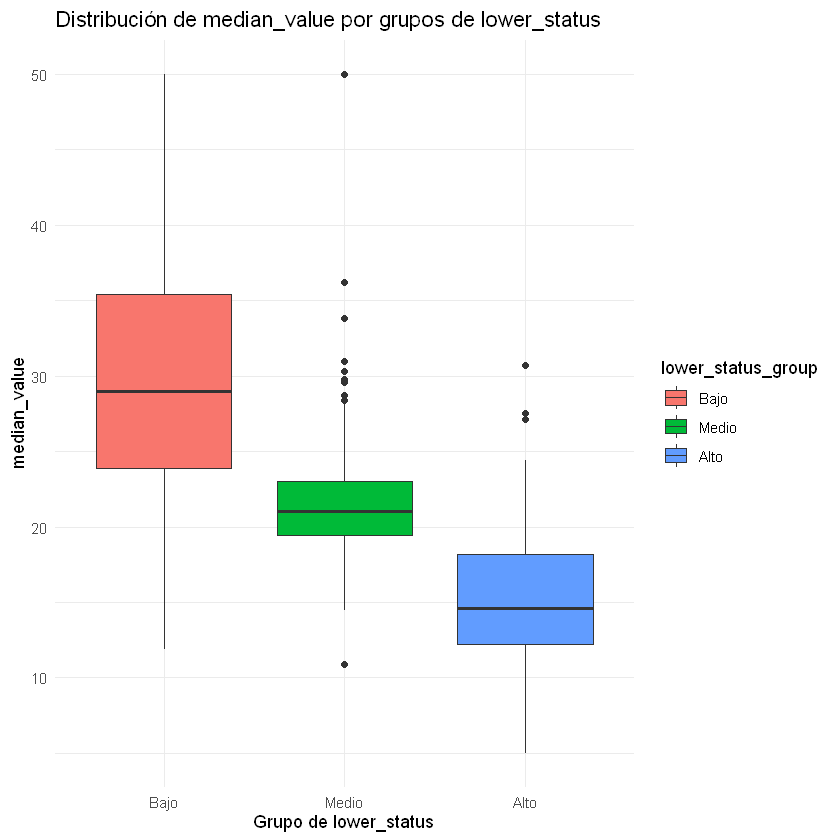

In [11]:
# Selección de datos
Boston_anova <- Boston[, c("median_value", "lower_status")]

# Crear grupos a partir de lower_status
Boston_anova$lower_status_group <- cut(
  Boston_anova$lower_status,
  breaks = quantile(Boston_anova$lower_status, probs = c(0, 0.33, 0.66, 1)),
  labels = c("Bajo", "Medio", "Alto"),
  include.lowest = TRUE
)


# Visualizar las diferencias entre grupos
ggplot(Boston_anova, aes(x = lower_status_group, y = median_value, fill = lower_status_group)) +
    geom_boxplot() +
    labs(title = "Distribución de median_value por grupos de lower_status",
         x = "Grupo de lower_status",
         y = "median_value") +
    theme_minimal()

# ANOVA
anova_result <- aov(median_value ~ lower_status_group, data = Boston_anova)
summary(anova_result)


## Interpretación del Análisis de ANOVA

Se ha realizado un análisis ANOVA de un factor con el objetivo de evaluar si existen diferencias significativas en el valor medio de la vivienda (`median_value`) entre distintos grupos definidos a partir de la variable `lower_status`. Para ello, esta variable se ha categorizado en tres niveles (Bajo, Medio y Alto) utilizando cuantiles, garantizando una distribución equilibrada de las observaciones y una adecuada limpieza de los datos.

La visualización mediante boxplots muestra un patrón claro: el grupo con menor porcentaje de población de clase baja presenta valores medios de vivienda más altos, mientras que los grupos con niveles medio y alto de `lower_status` muestran valores progresivamente más bajos. Este comportamiento sugiere una relación inversa entre el nivel socioeconómico de la zona y el precio de la vivienda.

El resultado del ANOVA confirma esta observación visual. El estadístico F obtenido es elevado y el p-value es inferior a 2·10⁻¹⁶, lo que indica que existen diferencias estadísticamente significativas entre las medias de `median_value` de los distintos grupos analizados. Por tanto, se rechaza la hipótesis nula de igualdad de medias.

---

## Conclusiones del ANOVA

El análisis ANOVA pone de manifiesto que la variable `lower_status` tiene un impacto significativo sobre el valor medio de la vivienda. Las diferencias observadas entre los grupos Bajo, Medio y Alto son estadísticamente significativas, lo que confirma la relevancia del contexto socioeconómico en la explicación del precio de la vivienda.

Estos resultados validan la selección de `lower_status` como una variable explicativa clave y justifican su inclusión en el modelo de regresión lineal posterior. Asimismo, el análisis refuerza las conclusiones obtenidas en los apartados de correlación y componentes principales, aportando evidencia estadística adicional sobre la influencia de factores socioeconómicos en el mercado inmobiliario.


## **4. Desarrollo y justificación de las variables**

## Desarrollo y justificación de las variables

En base a los resultados obtenidos en el análisis exploratorio, el análisis de correlación, el análisis de componentes principales y el análisis ANOVA, se ha realizado una selección de variables para la construcción del modelo de regresión lineal cuyo objetivo es explicar el valor medio de la vivienda (`median_value`).

El análisis de correlación ha permitido identificar las variables con una relación más clara con la variable objetivo. En este sentido, `rooms_per_dwelling` presenta una fuerte correlación positiva con `median_value`, mientras que `lower_status` muestra una fuerte correlación negativa. Estas relaciones indican que tanto las características físicas de la vivienda como el contexto socioeconómico son factores determinantes en el precio.

El análisis de componentes principales ha puesto de manifiesto la existencia de grupos de variables altamente correlacionadas entre sí, especialmente aquellas relacionadas con el entorno urbano-industrial y socioeconómico, como `industry_ratio`, `nox_concentration`, `highway_index` y `tax_ratio`. Este resultado sugiere la presencia de información redundante, por lo que se ha priorizado la selección de variables representativas de cada bloque de información.

Por su parte, el análisis ANOVA ha confirmado estadísticamente que la variable `lower_status` genera diferencias significativas en el valor medio de la vivienda entre distintos grupos socioeconómicos, validando su inclusión como variable explicativa en el modelo.

En consecuencia, se seleccionan como variables explicativas para el modelo de regresión lineal las siguientes:
- `rooms_per_dwelling`, por su fuerte relación positiva con el valor de la vivienda.
- `lower_status`, por su impacto negativo significativo y su validación mediante ANOVA.
- `crime_index`, como indicador del entorno social de la zona.
- `tax_ratio`, como variable representativa de la presión fiscal y del entorno urbano.
- `nox_concentration`, como indicador del nivel de contaminación ambiental.

Esta selección busca equilibrar capacidad explicativa e interpretabilidad del modelo, evitando problemas de multicolinealidad y garantizando que las variables incluidas aporten información complementaria relevante para la predicción del valor medio de la vivienda.


## **5. Estudio de regresión lineal del `median_value`**

In [12]:
# Modelo de regresión lineal del median_value con variables rooms_per_dwelling lower_status, crime_index, tax_ratio, nox_concentration
model <- lm(median_value ~ rooms_per_dwelling + lower_status + crime_index + tax_ratio + nox_concentration, data = Boston)
summary(model)



Call:
lm(formula = median_value ~ rooms_per_dwelling + lower_status + 
    crime_index + tax_ratio + nox_concentration, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.707  -3.543  -1.048   1.843  30.720 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.808673   3.380398  -0.831  0.40644    
rooms_per_dwelling  5.200309   0.441879  11.769  < 2e-16 ***
lower_status       -0.580646   0.052453 -11.070  < 2e-16 ***
crime_index        -0.001763   0.001479  -1.192  0.23370    
tax_ratio          -0.006309   0.002424  -2.602  0.00953 ** 
nox_concentration   5.073362   3.105013   1.634  0.10290    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.461 on 500 degrees of freedom
Multiple R-squared:  0.6509,	Adjusted R-squared:  0.6474 
F-statistic: 186.5 on 5 and 500 DF,  p-value: < 2.2e-16


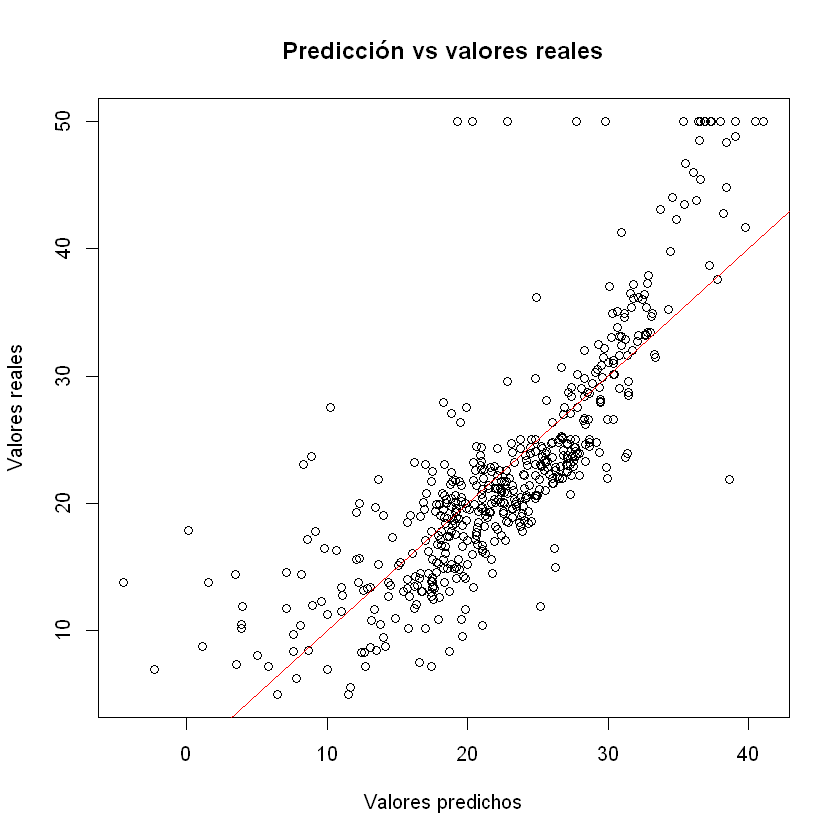

In [13]:
# Evaluación del modelo
predictions <- predict(model, Boston)
plot(predictions, Boston$median_value,
     xlab = "Valores predichos",
     ylab = "Valores reales",
     main = "Predicción vs valores reales")
abline(0, 1, col = "red")




Call:
lm(formula = median_value ~ rooms_per_dwelling + lower_status + 
    tax_ratio, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.000  -3.498  -1.019   1.954  30.788 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.498652   3.140239  -0.159 0.873895    
rooms_per_dwelling  5.199529   0.439618  11.827  < 2e-16 ***
lower_status       -0.552564   0.049302 -11.208  < 2e-16 ***
tax_ratio          -0.006501   0.001724  -3.770 0.000182 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.469 on 502 degrees of freedom
Multiple R-squared:  0.6485,	Adjusted R-squared:  0.6464 
F-statistic: 308.7 on 3 and 502 DF,  p-value: < 2.2e-16


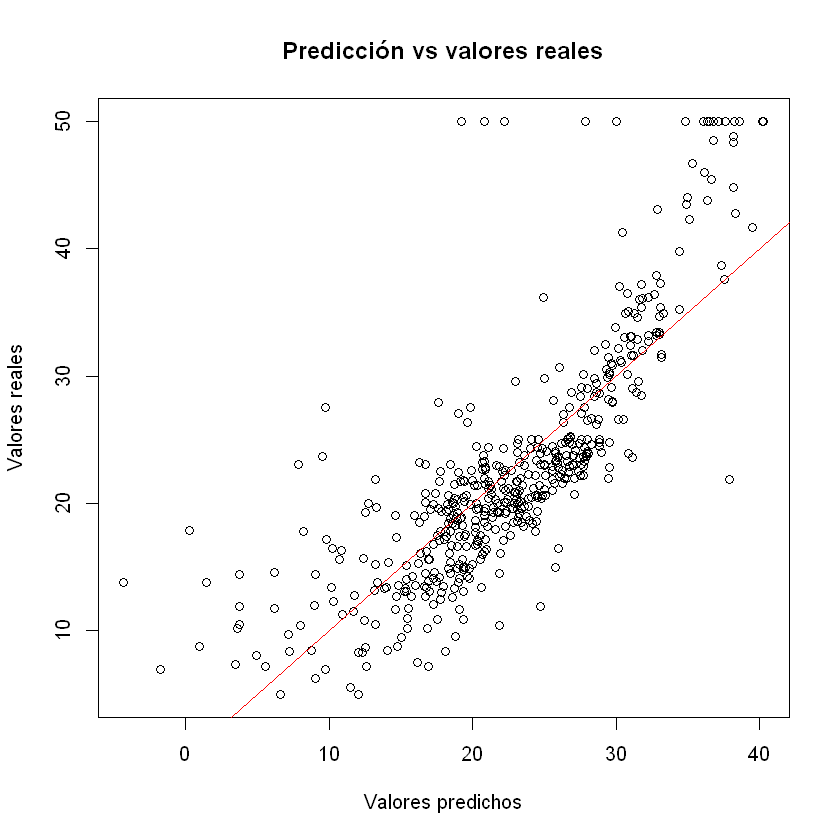

In [14]:
# Modelo de regresión lineal del median_value con variables rooms_per_dwelling lower_status, tax_ratio
model <- lm(median_value ~ rooms_per_dwelling + lower_status + tax_ratio, data = Boston)
summary(model)
# Evaluación del modelo
predictions <- predict(model, Boston)
plot(predictions, Boston$median_value,
     xlab = "Valores predichos",
     ylab = "Valores reales",
     main = "Predicción vs valores reales")
abline(0, 1, col = "red")

## 5. Conclusiones

### 5.1 Primer modelo de regresión lineal

En una primera aproximación se construyó un modelo de regresión lineal para explicar el valor medio de la vivienda (`median_value`) utilizando las variables que, según los análisis previos de visualización, correlación y ANOVA, mostraban una relación relevante con la variable objetivo:

- `rooms_per_dwelling`
- `lower_status`
- `crime_index`
- `tax_ratio`
- `nox_concentration`

El modelo obtenido presenta un **R² ajustado cercano a 0.65**, lo que indica que aproximadamente el 65% de la variabilidad del valor medio de la vivienda puede explicarse mediante estas variables. El estadístico F del modelo es significativo (p-value < 0.001), lo que confirma que el modelo global tiene capacidad explicativa.

Sin embargo, al analizar los coeficientes individuales se observa que no todas las variables incluidas resultan estadísticamente significativas. En particular, `crime_index` y `nox_concentration` presentan valores p elevados, lo que indica que su contribución al modelo es limitada una vez consideradas el resto de variables.

---

### 5.2 Modelo ajustado eliminando variables no significativas

Con el objetivo de mejorar la interpretabilidad del modelo y eliminar variables que no aportan información relevante, se construyó un segundo modelo eliminando aquellas variables no significativas del modelo inicial.

El modelo final incluye únicamente las siguientes variables:

- `rooms_per_dwelling`
- `lower_status`
- `tax_ratio`

Este modelo mantiene un **R² ajustado prácticamente idéntico** al del modelo inicial, lo que indica que la capacidad explicativa del modelo no se ve afectada de forma relevante por la eliminación de variables. Además, todas las variables incluidas son estadísticamente significativas y presentan coeficientes coherentes con los análisis previos.

La reducción del número de variables da lugar a un modelo más **simple y fácil de interpretar**, reduciendo el ruido y mejorando la claridad de las relaciones entre las variables explicativas y el valor medio de la vivienda.

---

### 5.3 Evaluación del modelo predictivo

La comparación entre los valores predichos y los valores reales muestra una relación lineal clara, con una dispersión moderada alrededor de la diagonal ideal. Esto indica que el modelo es capaz de capturar correctamente la tendencia general del precio de la vivienda, aunque existen desviaciones individuales que no pueden explicarse completamente mediante un modelo lineal.

El error estándar residual se mantiene en valores razonables y similares entre ambos modelos, lo que confirma que la simplificación del modelo no empeora su capacidad predictiva.

---

### 5.4 Respuesta a las preguntas del enunciado

**¿Qué resultados obtenemos en el modelo?**  
El modelo final explica una proporción elevada de la variabilidad del valor medio de la vivienda, identificando como variables clave el número medio de habitaciones, el porcentaje de población de clase baja y el nivel de impuestos de la zona.

**¿Predice correctamente?**  
El modelo predice de forma adecuada la tendencia general del valor de la vivienda, aunque no captura completamente todas las variaciones individuales. Su rendimiento es aceptable para un modelo lineal con fines explicativos.

**¿Utilizarías este modelo en la vida real?**  
Este modelo podría utilizarse como una herramienta de apoyo para entender los factores que influyen en el precio de la vivienda. No obstante, para aplicaciones reales de predicción sería recomendable complementarlo con modelos más complejos o no lineales y validar su rendimiento con datos externos.

---

## 6. Conclusiones generales

A lo largo de este análisis se ha realizado una exploración completa del conjunto de datos, comenzando por la visualización y descripción de las variables, seguida de un análisis de correlación, componentes principales, ANOVA y regresión lineal.

Los resultados muestran que variables relacionadas con el nivel socioeconómico de la zona y las características de la vivienda, como `lower_status` y `rooms_per_dwelling`, tienen un impacto claro y significativo sobre el valor medio de las viviendas en Boston. El análisis de correlación y PCA permitió identificar patrones y relaciones entre variables, mientras que el ANOVA confirmó diferencias significativas entre grupos socioeconómicos.

Finalmente, el modelo de regresión lineal permitió cuantificar estas relaciones, obteniendo un modelo sencillo, interpretable y con una capacidad explicativa razonable. En conjunto, el análisis cumple con los objetivos planteados en el enunciado y proporciona una visión clara de los principales factores que influyen en el precio de la vivienda.

